<a href="https://colab.research.google.com/github/Neoneto/09-Week-9-Unsupervised-Learning-/blob/main/Clustering_Comparison.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Clustering Comparison
Submitted by Kenneth Alaba




In [85]:
# Mount the drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [101]:
# Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans, AgglomerativeClustering, DBSCAN
from sklearn.metrics import silhouette_score

In [87]:
# Load the dataset
df0 = pd.read_csv('/content/drive/My Drive/Coding Dojo/09 Week 9: Unsupervised Learning/cust_seg.csv')
df0.head()

,Unnamed: 0,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,0,1,41,2,6,19,0.124,1.073,0.0,6.3
1,1,2,47,1,26,100,4.582,8.218,0.0,12.8
2,2,3,33,2,10,57,6.111,5.802,1.0,20.9
3,3,4,29,2,4,19,0.681,0.516,0.0,6.3
4,4,5,47,1,31,253,9.308,8.908,0.0,7.2


In [88]:
# Drop the unnecessary column
df = df0.drop(columns = ['Unnamed: 0', 'Customer Id'])
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio
0,41,2,6,19,0.124,1.073,0.0,6.3
1,47,1,26,100,4.582,8.218,0.0,12.8
2,33,2,10,57,6.111,5.802,1.0,20.9
3,29,2,4,19,0.681,0.516,0.0,6.3
4,47,1,31,253,9.308,8.908,0.0,7.2


In [89]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 850 entries, 0 to 849
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Age              850 non-null    int64  
 1   Edu              850 non-null    int64  
 2   Years Employed   850 non-null    int64  
 3   Income           850 non-null    int64  
 4   Card Debt        850 non-null    float64
 5   Other Debt       850 non-null    float64
 6   Defaulted        700 non-null    float64
 7   DebtIncomeRatio  850 non-null    float64
dtypes: float64(4), int64(4)
memory usage: 53.2 KB


In [90]:
# Fill mising values in the Defaulted column with the mode
df['Defaulted'].fillna(df['Defaulted'].mode()[0], inplace = True)

In [91]:
# Scale the data

# Instantiate Standard Scaler
scaler = StandardScaler()
# Fit & transform data.
scaled_df = scaler.fit_transform(df)

In [92]:
# Instantiate KMeans
kmeans = KMeans(n_clusters = 2)
kmeans.fit(scaled_df)

KMeans(n_clusters=2)

In [93]:
# Store the cluster in the df
df['Cluster'] = kmeans.labels_
df.head()

,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,DebtIncomeRatio,Cluster
0,41,2,6,19,0.124,1.073,0.0,6.3,1
1,47,1,26,100,4.582,8.218,0.0,12.8,0
2,33,2,10,57,6.111,5.802,1.0,20.9,0
3,29,2,4,19,0.681,0.516,0.0,6.3,1
4,47,1,31,253,9.308,8.908,0.0,7.2,0


Text(0, 0.5, 'Education')

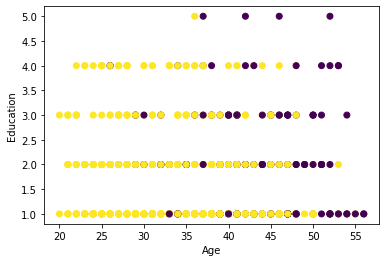

In [97]:
# Visualize the clusters

plt.scatter(df.Age, df.Edu, c = df.Cluster)
plt.xlabel('Age')
plt.ylabel('Education')

Text(0, 0.5, 'Defaulted')

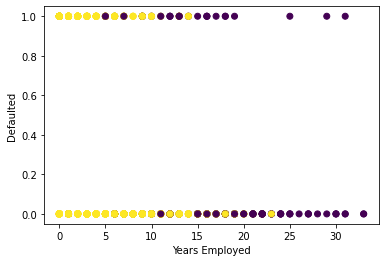

In [100]:
plt.scatter(df['Years Employed'], df['Defaulted'], c = df.Cluster,)
plt.xlabel('Years Employed')
plt.ylabel('Defaulted')

Text(0, 0.5, 'DebtIncomeRatio')

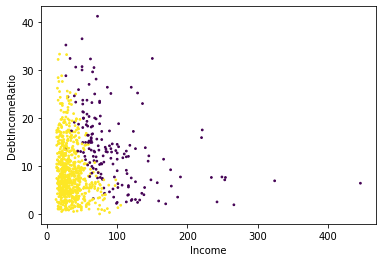

In [95]:
plt.scatter(df['Income'], df['DebtIncomeRatio'], c = df.Cluster, s = 3)
plt.xlabel('Income')
plt.ylabel('DebtIncomeRatio')

In [96]:
# import plotly
import plotly.express as px

# Create a 3D scatterplot
fig = px.scatter_3d(df, x='Income', y='Card Debt', z='Other Debt',
              color='Cluster', )

fig.update_traces(marker=dict(size=3,
                              line=dict(width=2,
                                        color='DarkSlateGrey')),
                  selector=dict(mode='markers'))
fig.show()

The dataset is divided into two clusters and we can se that the segmentation divide heavily depends on the customer's characteristics related to money such as Debt and income.

In [102]:
# silhouette_score for the Kmeans
silhouette_score(scaled_df, kmeans.labels_)

0.34498024193061866

# Other Clustering Models


In [103]:
# Hierarchical clustering
hc = AgglomerativeClustering(n_clusters = 2)
hc.fit(scaled_df)
silhouette_score(scaled_df, hc.labels_)

0.3755129973554509

In [115]:
# DBSCAN clustering
dbs = DBSCAN(eps = 0.5, min_samples = 10).fit(scaled_df)
silhouette_score(scaled_df, dbs.labels_)

-0.120144899009974

Of the three models used, the Hierarchical clustering model performed the best for this data using 2 clusters with the highest silhouette score. The worst on the other hand is the DBSCAN wit a negative silhouete score.